<h2>Final Project</h2>

<h2> Importing Libraries </h2>

In [129]:
import pandas as pd
import re
import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from matplotlib import pyplot
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import homogeneity_score, v_measure_score, completeness_score
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sn
from imblearn.over_sampling import SMOTE
import scipy as scp

[nltk_data] Downloading package stopwords to /Users/j/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2> Reading the dataset </h2>

In [130]:
dataset = pd.read_csv("train.csv",names=["Review", "Title", "Text"], nrows=5000)
dataset.head()

,Review,Title,Text
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...


In [131]:
#Checking for null values in the dataset
dataset.isnull().sum()

Review    0
Title     0
Text      0
dtype: int64

In [132]:
#dropping the null values in the dataset
dataset = dataset.dropna()

<h2> Data Preprocessing </h2>

<h3> Data cleaning and De-contraction of words</h3>

In [133]:
#Using contraction function to perform data cleaning and decontraction of the word
def contraction(text):
    list1 = []
    for i in text:
        text = i.lower()
        text = text.replace("’", "'")
        text = text.replace("’", "'")
        text = text.replace("“", "")
        text = text.replace("”", "")
        text = text.replace("ain't", "am not")
        text = text.replace("aren't", "are not")
        text = text.replace("can't", "can not")
        text = text.replace("can't've", "can not have")
        text = text.replace("'cause", "because")
        text = text.replace("could've", "could have")
        text = text.replace("couldn't", "could not")
        text = text.replace("couldn't've", "could not have")
        text = text.replace("didn't", "did not")
        text = text.replace("doesn't", "does not")
        text = text.replace("don't", "do not")
        text = text.replace("hadn't", "had not")
        text = text.replace("hadn't've", "had not have")
        text = text.replace("hasn't", "has not")
        text = text.replace("haven't", "have not")
        text = text.replace("he'd", "he had")
        text = text.replace("he'd've", "he would have")
        text = text.replace("he'll", "he will")
        text = text.replace("he'll've", "he will have")
        text = text.replace("he's", "he has")
        text = text.replace("how'd", "how did")
        text = text.replace("how'd'y", "how do you")
        text = text.replace("how'll", "how will")
        text = text.replace("how's", "how has")
        text = text.replace("i'd", "I had")
        text = text.replace("i'd've", "I would have")
        text = text.replace("i'll", "I shall")
        text = text.replace("i'll've", "I shall have")
        text = text.replace("i'm", "I am")
        text = text.replace("im ", "I am")
        text = text.replace("i've", "I have")
        text = text.replace("isn't", "is not")
        text = text.replace("it'd", "it had")
        text = text.replace("it'd've", "it would have")
        text = text.replace("it'll", "it shall")
        text = text.replace("it'll've", "it shall have")
        text = text.replace("it's", "it has")
        text = text.replace("let's", "let us")
        text = text.replace("ma'am", "madam")
        text = text.replace("mayn't", "may not")
        text = text.replace("might've", "might have")
        text = text.replace("mightn't", "might not")
        text = text.replace("mightn't've", "might not have")
        text = text.replace("must've", "must have")
        text = text.replace("mustn't", "must not")
        text = text.replace("mustn't've", "must not have")
        text = text.replace("needn't", "need not")
        text = text.replace("needn't've", "need not have")
        text = text.replace("o'clock", "of the clock")
        text = text.replace("oughtn't", "ought not")
        text = text.replace("oughtn't've", "ought not have")
        text = text.replace("shan't", "shall not")
        text = text.replace("sha'n't", "shall not")
        text = text.replace("shan't've", "shall not have")
        text = text.replace("she'd", "she had")
        text = text.replace("she'd've", "she would have")
        text = text.replace("she'll", "she shall")
        text = text.replace("she'll've", "she shall have")
        text = text.replace("she's", "she has")
        text = text.replace("should've", "should have")
        text = text.replace("shouldn't", "should not")
        text = text.replace("shouldn't've", "should not have")
        text = text.replace("so've", "so have")
        text = text.replace("so's", "so as")
        text = text.replace("that'd", "that would")
        text = text.replace("that'd've", "that would have")
        text = text.replace("that's", "that has")
        text = text.replace("there'd", "there had")
        text = text.replace("there'd've", "there would have")
        text = text.replace("there's", "there has")
        text = text.replace("they'd", "they had")
        text = text.replace("they'd've", "they would have")
        text = text.replace("they'll", "they shall")
        text = text.replace("they'll've", "they shall have")
        text = text.replace("they're", "they are")
        text = text.replace("they've", "they have")
        text = text.replace("to've", "to have")
        text = text.replace("wasn't", "was not")
        text = text.replace("we'd", "we had")
        text = text.replace("we'd've", "we would have")
        text = text.replace("we'll", "we will")
        text = text.replace("we'll've", "we will have")
        text = text.replace("we're", "we are")
        text = text.replace("we've", "we have")
        text = text.replace("weren't", "were not")
        text = text.replace("what'll", "what shall")
        text = text.replace("what'll've", "what shall have")
        text = text.replace("what're", "what are")
        text = text.replace("what's", "what has")
        text = text.replace("what've", "what have")
        text = text.replace("when's", "when has")
        text = text.replace("when've", "when have")
        text = text.replace("where'd", "where did")
        text = text.replace("where's", "where has")
        text = text.replace("where've", "where have")
        text = text.replace("who'll", "who shall")
        text = text.replace("who'll've", "who shall have")
        text = text.replace("who's", "who has")
        text = text.replace("who've", "who have")
        text = text.replace("why's", "why has")
        text = text.replace("why've", "why have")
        text = text.replace("will've", "will have")
        text = text.replace("won't", "will not")
        text = text.replace("won't've", "will not have")
        text = text.replace("would've", "would have")
        text = text.replace("wouldn't", "would not")
        text = text.replace("wouldn't've", "would not have")
        text = text.replace("y'all", "you all")
        text = text.replace("y'all'd", "you all would")
        text = text.replace("y'all'd've", "you all would have")
        text = text.replace("y'all're", "you all are")
        text = text.replace("y'all've", "you all have")
        text = text.replace("you'd", "you had")
        text = text.replace("you'd've", "you would have")
        text = text.replace("you'll", "you shall")
        text = text.replace("you'll've", "you shall have")
        text = text.replace("you're", "you are")
        text = text.replace("you've", "you have")
        text = re.sub(r'[^a-zA-Z]+', ' ', text)
        text = re.sub(r'(\s){2,}', ' ', text)
        text = re.sub(r'^\s$', '', text)
        text = re.sub(r'[m]{2,}', 'mm', text)
        text = text.strip()
        list1.append(text)
    return list1

In [134]:
#calling the contraction function to perform data cleaning and de-contraction of english words
dataset['Text_1'] = contraction(dataset['Text'])
dataset

,Review,Title,Text,Text_1
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...,gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...,i hope a lot of people hear this cd we need mo...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,I am reading a lot of reviews saying that this...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...,the music of yasunori misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...,probably the greatest soundtrack in history us...
...,...,...,...,...
4995,2,Waste oF $MONEY$,Waste Of Time & Money... I found that if you w...,waste of time money i found that if you want t...
4996,4,trying to win better,This book cuts down the odds with a better cha...,this book cuts down the odds with a better cha...
4997,2,"don""t waste your money just buy the the lotter...",this book have almost the same information as ...,this book have almost the same information as ...
4998,2,The odds are against you not for you.,Winning is pure luck. There is no amount of st...,winning is pure luck there is no amount of str...


In [135]:
#removing duplicates and dropping the Null values after cleaning the data
dataset.drop_duplicates(subset=['Text_1'],inplace=True)
dataset.dropna(axis=0,inplace=True)
dataset.reset_index(drop=True, inplace=True)
dataset

,Review,Title,Text,Text_1
0,3,more like funchuck,Gave this to my dad for a gag gift after direc...,gave this to my dad for a gag gift after direc...
1,5,Inspiring,I hope a lot of people hear this cd. We need m...,i hope a lot of people hear this cd we need mo...
2,5,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...,I am reading a lot of reviews saying that this...
3,4,Chrono Cross OST,The music of Yasunori Misuda is without questi...,the music of yasunori misuda is without questi...
4,5,Too good to be true,Probably the greatest soundtrack in history! U...,probably the greatest soundtrack in history us...
...,...,...,...,...
4994,2,Waste oF $MONEY$,Waste Of Time & Money... I found that if you w...,waste of time money i found that if you want t...
4995,4,trying to win better,This book cuts down the odds with a better cha...,this book cuts down the odds with a better cha...
4996,2,"don""t waste your money just buy the the lotter...",this book have almost the same information as ...,this book have almost the same information as ...
4997,2,The odds are against you not for you.,Winning is pure luck. There is no amount of st...,winning is pure luck there is no amount of str...


In [136]:
#drop the unecessary column and renaming it
dataset = dataset.drop(columns=['Text'], axis = 1)
dataset = dataset.rename(columns={'Text_1':'Text'})

In [137]:
dataset.head()

,Review,Title,Text
0,3,more like funchuck,gave this to my dad for a gag gift after direc...
1,5,Inspiring,i hope a lot of people hear this cd we need mo...
2,5,The best soundtrack ever to anything.,I am reading a lot of reviews saying that this...
3,4,Chrono Cross OST,the music of yasunori misuda is without questi...
4,5,Too good to be true,probably the greatest soundtrack in history us...


<h2> Data Visualization </h2>

<h3> Calculating the word occurences in the dataset <i>(Before stopwords removal and lemmatization)</i></h3>

In [138]:
#Calculating the count of each word occurences - before
def word_occurence(df):
    words = df['Text'].str.split(expand=True).unstack().value_counts()
    return words

In [139]:
#calling word_occurence function
dataset_count_before = word_occurence(dataset)

<h3>Bar Graph</h3>
<i><h4>Displaying top 50 words based on word occurences</h4> </i>

In [140]:
#function to display the words occurence in a bar graph from highest to lowest
#bar graph to represent the most frequent words
def freq_word(df):
    init_notebook_mode(connected=True)
    data = [go.Bar(
                x = df.index.values[0:50],
                y = df.values[0:50],
                marker= dict(colorscale='Viridis',color = df.values[0:100]),text='Word counts')]
    layout = go.Layout(title='Frequent occuring words')
    fig = go.Figure(data=data, layout=layout)
    return fig

In [141]:
#calling freq_word function
dataset_count_before_bar = freq_word(dataset_count_before)

In [142]:
#displaying the bar chart for each files
iplot(dataset_count_before_bar, filename='basic-bar')

<h3>Word Cloud</h3>
<i><h4>Displaying top 50 words based on word occurences</h4> </i>

In [143]:
#Word Cloud to represent the most frequent words
def wordcloud(df):
    wordcloud = WordCloud(background_color='white', max_words = 100).generate_from_frequencies(df)
    return wordcloud

In [144]:
#calling the wordcloud function
dataset_count_before_wordcloud = wordcloud(dataset_count_before)

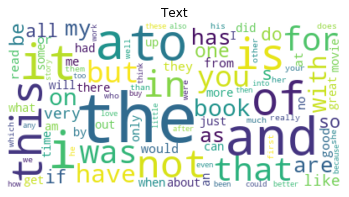

In [145]:
#displaying the worldcloud generated for the dataset
plt.imshow(dataset_count_before_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Text')
plt.show()

<h2> Implementing Data Preprocessing techniques </h2>
<h3> Implementing Stopwords Removal and Lemmatization </h3>

In [146]:
#obtaining the english stopwords from the stopwords library
stopwords_removal = stopwords.words('english')
stopwords_removal.remove('not')
stopwords_removal.remove('no')

In [147]:
#Stopwords removal and Lemmatization of textual data
def Lemmatizaton_text(df):
    lemmatization = WordNetLemmatizer()
    for ind, text in enumerate(df['Text']):
        temp = []
        for word in str(text).split():
            word = word.lower()
            word = word.strip()
            if word not in stopwords_removal and word.isalpha():
                lemmatize_word = lemmatization.lemmatize(word)
                temp.append(lemmatize_word)
                df.loc[ind,'Text'] = str(" ".join(temp))
    return df

In [148]:
#calling the lemmatization function
dataset = Lemmatizaton_text(dataset)
dataset

,Review,Title,Text
0,3,more like funchuck,gave dad gag gift directing nunsense got reall...
1,5,Inspiring,hope lot people hear cd need strong positive v...
2,5,The best soundtrack ever to anything.,reading lot review saying best game soundtrack...
3,4,Chrono Cross OST,music yasunori misuda without question close s...
4,5,Too good to be true,probably greatest soundtrack history usually b...
...,...,...,...
4994,2,Waste oF $MONEY$,waste time money found want win big put money ...
4995,4,trying to win better,book cut odds better chance winning lotto game...
4996,2,"don""t waste your money just buy the the lotter...",book almost information lottery master guide f...
4997,2,The odds are against you not for you.,winning pure luck no amount strategy unless al...


<h3> Calculating the word occurences in the dataset <i>(After stopwords removal and lemmatization)</i></h3>

In [149]:
#calling word_occurence function
dataset_count_after = word_occurence(dataset)

In [150]:
#calling freq_word function
dataset_count_after_bar = freq_word(dataset_count_after)

In [151]:
#displaying the bar chart for the words in the dataset
iplot(dataset_count_after_bar, filename='basic-bar')

In [152]:
#calling the wordcloud function
dataset_count_after_wordcloud = wordcloud(dataset_count_after)
# train_title_count_after_wordcloud = wordcloud(train_title_count_after)

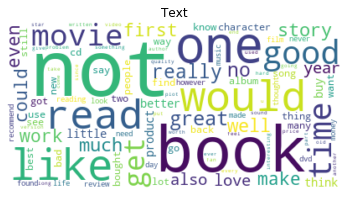

In [153]:
#displaying the worldcloud generated
plt.imshow(dataset_count_after_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Text')
plt.show()

<h3> Calculating the distribution of words in each review </h3>

In [154]:
#function calculating the length of the sentences
def count(df):
    count = []
    for i in df:
        count.append(len(i.split(" ")))
    return count

In [155]:
#calculate the text word and summary word counts
dataset_text_word_count = count(dataset['Text'])

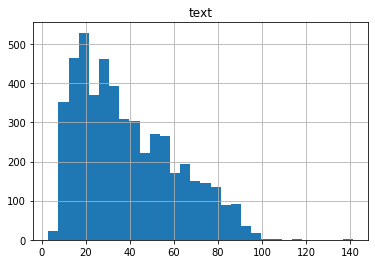

In [156]:
#combining the length of text and summary as a list and store in a dataframe
#display the histogram for the length of words in a sentence
length_df = pd.DataFrame({'text':dataset_text_word_count})
length_df.hist(bins = 30)
plt.show()

In [157]:
#displaying the sample rows of dataset
dataset.head()

,Review,Title,Text
0,3,more like funchuck,gave dad gag gift directing nunsense got reall...
1,5,Inspiring,hope lot people hear cd need strong positive v...
2,5,The best soundtrack ever to anything.,reading lot review saying best game soundtrack...
3,4,Chrono Cross OST,music yasunori misuda without question close s...
4,5,Too good to be true,probably greatest soundtrack history usually b...


In [158]:
#splitting the dataset
feature = dataset.iloc[:,-1].values

In [159]:
feature

array(['gave dad gag gift directing nunsense got reall kick',
       'hope lot people hear cd need strong positive vibe like great vocal fresh tune cross cultural happiness blue gut pop sound catchy mature',
       'reading lot review saying best game soundtrack figured write review disagree bit opinino yasunori mitsuda ultimate masterpiece music timeless listening year beauty simply refuse fade price tag pretty staggering must say going buy cd much money one feel would worth every penny',
       ...,
       'book almost information lottery master guide first time player pro player master guide best every book waste money',
       'winning pure luck no amount strategy unless already rich believe not rich people play buy ticket week cannot reality take one set number win anyway gail conviently leaf one fact winner quick pick rest year number cannot predict powerball book good idea many people using kind random system doubt luck pure simple',
       'actual model meter unsure number rele

<h3> Counting the frequent words used in review based on the threshold set </h3>

In [160]:
threshold = 3
count = 0
for i in dataset_count_after:
    if i > threshold:
        count = count + 1
print("The most frequent words in the dataset",count)

The most frequent words in the dataset 5519


<h2> Feature Engineering </h2>

<h3> Bag of Words </h3>

In [161]:
cv_bow = CountVectorizer(max_features=5500)
bow = cv_bow.fit_transform(feature).toarray()

In [162]:
bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

<h3> TF-IDF </h3>

In [163]:
vectorizer = TfidfVectorizer(use_idf=True, max_features = 5500)
tf_Idf = vectorizer.fit_transform(feature)

In [164]:
#converting from CSR matrix to numpy array
tf_Idf_np =  scp.sparse.csr_matrix.toarray(tf_Idf)

In [165]:
tf_Idf_np

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

<h3> Word Embedding - Glove </h3>

In [166]:
#opening and storing the Glove vectors for each word in an dictionary
word_embed_glove = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    data = line.split()
    words = data[0]
    coeffs = np.asarray(data[1:], dtype='float32')
    word_embed_glove[words] = coeffs
f.close()

In [167]:
#Using a function to obtain the Glove vectors for a word and taking their mean to understand the vectors for a sentence
def features(df):
    vectors = []
    for i in df:
        if len(i) != 0:
            y = sum([word_embed_glove.get(w, np.zeros((100,))) for w in i.split()])
            x = (len(i.split())+0.001)
            v = y/x
        else:
            v = np.zeros((100,))
        vectors.append(v)
    return vectors

In [168]:
#calling the function feature to perform feature engineering - Glove
glove = features(feature)

In [169]:
glove_np = np.array(glove)

<h1> Clustering </h1>
<h3> K-Means Clustering </h3>

<h3> To find the optimal number of clusters - Elbow Method - BoW </h3>

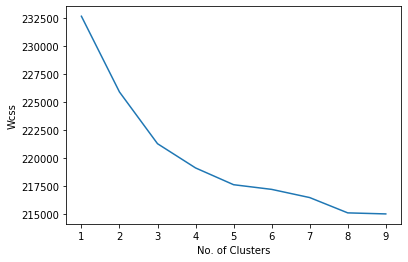

In [170]:
Wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    kmeans.fit(bow)
    Wcss.append(kmeans.inertia_)
plt.plot(range(1,10),Wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.show()

<h3> Final clustering of the dataset, k = 3 </h3>
<p> No. of clusters = 3 </p>
<h3> Prediction of K-Means clustering </h3>

In [171]:
#applying KMeans clustering on the created dataset with features
kmeans1 = KMeans(n_clusters=3, init='k-means++', random_state = 0)
ykmeans1 = kmeans1.fit_predict(bow)
ykmeans1

array([1, 1, 1, ..., 1, 1, 2], dtype=int32)

<h3> Distribution of clusters - BoW </h3>

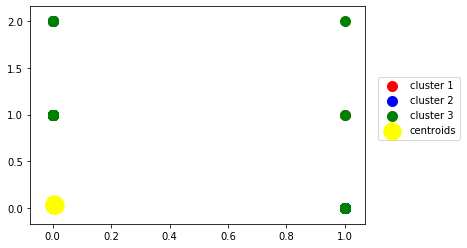

In [172]:
plt.scatter(bow[ykmeans1==0,0],bow[ykmeans1==0,1], s=100, c = 'red', label = 'cluster 1')
plt.scatter(bow[ykmeans1==1,0],bow[ykmeans1==1,1], s=100, c = 'blue', label = 'cluster 2')
plt.scatter(bow[ykmeans1==2,0],bow[ykmeans1==2,1], s=100, c = 'green', label = 'cluster 3')
plt.scatter(kmeans1.cluster_centers_[:,0],kmeans1.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.show()

<h3> To find the optimal number of clusters - Elbow Method - TF-IDF </h3>

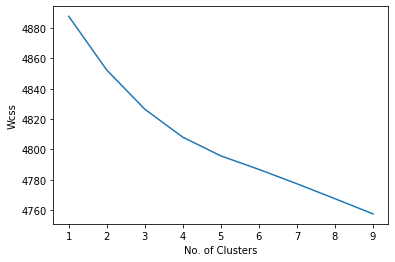

In [173]:
Wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    kmeans.fit(tf_Idf_np)
    Wcss.append(kmeans.inertia_)
plt.plot(range(1,10),Wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.show()

In [174]:
#applying KMeans clustering on the created dataset with features
kmeans2 = KMeans(n_clusters=3, init='k-means++', random_state = 0)
ykmeans2 = kmeans2.fit_predict(tf_Idf_np)
ykmeans2

array([0, 0, 0, ..., 2, 0, 0], dtype=int32)

<h3> Distribution of clusters - TF-IDF </h3>

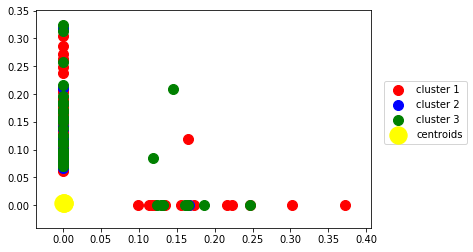

In [175]:
plt.scatter(tf_Idf_np[ykmeans2==0,0],tf_Idf_np[ykmeans2==0,1], s=100, c = 'red', label = 'cluster 1')
plt.scatter(tf_Idf_np[ykmeans2==1,0],tf_Idf_np[ykmeans2==1,1], s=100, c = 'blue', label = 'cluster 2')
plt.scatter(tf_Idf_np[ykmeans2==2,0],tf_Idf_np[ykmeans2==2,1], s=100, c = 'green', label = 'cluster 3')
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids')
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.show()

<h3> To find the optimal number of clusters - Elbow Method - Glove </h3>

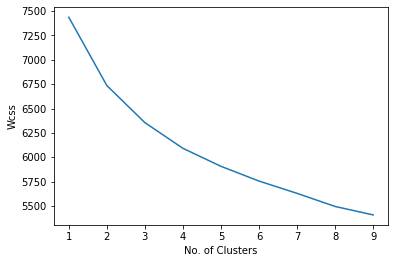

In [176]:
Wcss = []
for i in range(1,10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state = 0)
    kmeans.fit(glove)
    Wcss.append(kmeans.inertia_)
plt.plot(range(1,10),Wcss)
plt.xlabel('No. of Clusters')
plt.ylabel('Wcss')
plt.show()

In [177]:
#applying KMeans clustering on the created dataset with features
kmeans3 = KMeans(n_clusters=3, init='k-means++', random_state = 0)
ykmeans3 = kmeans3.fit_predict(glove)
ykmeans3

array([0, 0, 2, ..., 2, 2, 1], dtype=int32)

<h3> Distribution of clusters - Glove </h3>

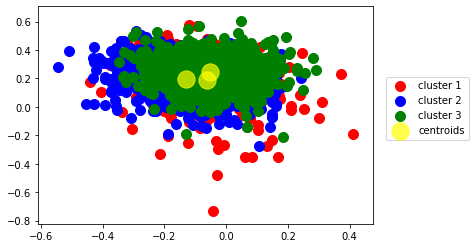

In [178]:
plt.scatter(glove_np[ykmeans3==0,0],glove_np[ykmeans3==0,1], s=100, c = 'red', label = 'cluster 1')
plt.scatter(glove_np[ykmeans3==1,0],glove_np[ykmeans3==1,1], s=100, c = 'blue', label = 'cluster 2')
plt.scatter(glove_np[ykmeans3==2,0],glove_np[ykmeans3==2,1], s=100, c = 'green', label = 'cluster 3')
plt.scatter(kmeans3.cluster_centers_[:,0],kmeans3.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'centroids', alpha = 0.7)
plt.legend(bbox_to_anchor=(1.3, 0.7))
plt.show()

<h3> Create Target variable based on review ratings </h3>

In [179]:
#created a function to create label for positive/negative/neutral
def label(df):
    Label = [] 
    for i in range(len(df)):
        if df['Review'][i] > 3:
            Label.append("Positive")
        elif df['Review'][i] < 3: 
            Label.append("Negative")
        else: 
            Label.append("Neutral")
    label_data = pd.DataFrame(Label,columns=['Sentiment'])
    df = pd.concat([df, label_data], ignore_index=True, axis = 1)
    df = df.rename(columns={0: "Review", 1: "Title", 2: "Text", 3: "Sentiment"})
    return df

In [180]:
#calling the label function to create target class with labels as positive/negative/neutral
dataset = label(dataset)
dataset

,Review,Title,Text,Sentiment
0,3,more like funchuck,gave dad gag gift directing nunsense got reall...,Neutral
1,5,Inspiring,hope lot people hear cd need strong positive v...,Positive
2,5,The best soundtrack ever to anything.,reading lot review saying best game soundtrack...,Positive
3,4,Chrono Cross OST,music yasunori misuda without question close s...,Positive
4,5,Too good to be true,probably greatest soundtrack history usually b...,Positive
...,...,...,...,...
4994,2,Waste oF $MONEY$,waste time money found want win big put money ...,Negative
4995,4,trying to win better,book cut odds better chance winning lotto game...,Positive
4996,2,"don""t waste your money just buy the the lotter...",book almost information lottery master guide f...,Negative
4997,2,The odds are against you not for you.,winning pure luck no amount strategy unless al...,Negative


In [181]:
Y = dataset.iloc[:,-1].values

In [182]:
len(Y)

4999

In [183]:
#labelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

<h3> Evaluation of Clusters based on created target variable using review rating </h3>

<h3> Cluster Data 1 - BoW </h3>

In [184]:
print("%.1f" % homogeneity_score(Y, ykmeans1))
print("%.4f" % v_measure_score(Y, ykmeans1))
print("%.4f" % completeness_score(Y, ykmeans1))

0.0
0.0177
0.0189


<h3> Cluster Data 2 - TF-IDF </h3>

In [185]:
print("%.1f" % homogeneity_score(Y, ykmeans2))
print("%.4f" % v_measure_score(Y, ykmeans2))
print("%.4f" % completeness_score(Y, ykmeans2))

0.0
0.0032
0.0036


<h3> Cluster Data 3 - Glove </h3>

In [186]:
print("%.1f" % homogeneity_score(Y, ykmeans3))
print("%.4f" % v_measure_score(Y, ykmeans3))
print("%.4f" % completeness_score(Y, ykmeans3))

0.0
0.0099
0.0096


<h3> Distribution of labels in the dataset</h3>

In [187]:
#function to calculate the distribution of labels in the dataset
def label_count(df):
    count_neg = 0
    count_pos = 0
    count_neu = 0
    list1 = []
    for i in df['Sentiment']:
        if i == 'Positive':
            count_pos = count_pos + 1
        elif i == 'Negative':
            count_neg = count_neg + 1
        else:
            count_neu = count_neu + 1

    list1.append(count_pos)
    list1.append(count_neg)
    list1.append(count_neu)
    return list1

In [188]:
#calling label count function to evaluate the distribution of data
dataset_label_count = label_count(dataset)
dataset_label_count

[1910, 2101, 988]

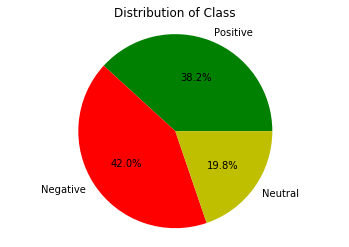

In [189]:
fig = plt.figure()
Sentiments = ['Positive', 'Negative', 'Neutral']
mycolors = ["g", "r", "y"]
plt.pie(dataset_label_count,labels=Sentiments,autopct='%1.1f%%', colors = mycolors)
plt.title('Distribution of Class')
plt.axis('equal')
plt.show()

<h3> Over Sampling </h3>

In [191]:
oversample_bow = SMOTE(sampling_strategy='not majority')
X_bow, Y_bow = oversample_bow.fit_resample(bow, Y)

In [192]:
oversample_tf_idf = SMOTE(sampling_strategy='not majority')
tf_Idf, Y_tf_Idf = oversample_tf_idf.fit_resample(tf_Idf, Y)

In [193]:
oversample_glove = SMOTE(sampling_strategy='not majority')
glove, Y_glove = oversample_glove.fit_resample(glove, Y)

<h3> Distribution of class after oversampling the minority classes </h3>

In [194]:
count_neg = 0
count_pos = 0
count_neu = 0
list1 = []
for i in Y_bow:
    if i == 0:
        count_pos = count_pos + 1
    elif i == 1:
        count_neg = count_neg + 1
    else:
        count_neu = count_neu + 1

list1.append(count_pos)
list1.append(count_neg)
list1.append(count_neu)

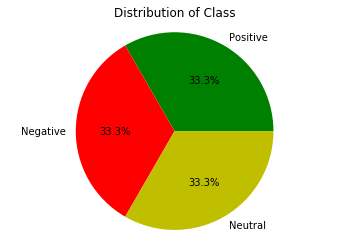

In [195]:
fig = plt.figure()
Sentiments = ['Positive', 'Negative', 'Neutral']
mycolors = ["g", "r", "y"]
plt.pie(list1,labels=Sentiments,autopct='%1.1f%%',colors = mycolors)
plt.title('Distribution of Class')
plt.axis('equal')
plt.show()

<h3> Splitting of dataset </h3>

In [196]:
X_train_bow, X_test_bow, Y_train_bow, Y_test_bow = train_test_split(X_bow,Y_bow, test_size = 0.2, random_state = 1)
X_train_tfidf, X_test_tfidf, Y_train_tfidf, Y_test_tfidf = train_test_split(tf_Idf,Y_tf_Idf, test_size = 0.2, random_state = 1)
X_train_glove, X_test_glove, Y_train_glove, Y_test_glove = train_test_split(glove,Y_glove, test_size = 0.2, random_state = 1)

<h3> Feature Scaling for Glove </h3>

In [197]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_glove_scale = sc.fit_transform(X_train_glove)
X_test_glove_scale = sc.transform(X_test_glove)

<h3> Multinominal Naive Bayes with Bag of Words - Baseline Model </h3>

In [198]:
classifier_MNB_baseline_bow = MultinomialNB()
classifier_MNB_baseline_bow.fit(X_train_bow,Y_train_bow)
pred_MNB_baseline_bow = classifier_MNB_baseline_bow.predict(X_test_bow)
pred_MNB_baseline_bow

array([0, 0, 0, ..., 2, 1, 0])

Accuracy: 0.6153846153846154
f1 Score 0.6147080512364211
confusion_matrix [[293  77  39]
 [115 238  75]
 [ 86  93 245]]
precision_score 0.6196339985740367
recall_score 0.6167621243757649


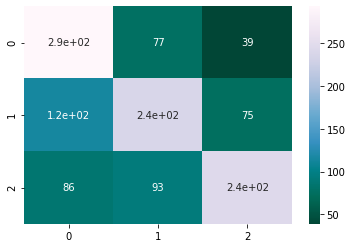

In [199]:
#prediction with accuracy and f1 scores for baseline model - NaiveBayes
print("Accuracy:",metrics.accuracy_score(Y_test_bow, pred_MNB_baseline_bow))
print("f1 Score", f1_score(Y_test_bow, pred_MNB_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_bow, pred_MNB_baseline_bow))
cm = confusion_matrix(Y_test_bow, pred_MNB_baseline_bow)
print("precision_score", precision_score(Y_test_bow, pred_MNB_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test_bow, pred_MNB_baseline_bow,average = "macro"))
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

<h3> Multinominal Naive Bayes with TF-IDF - Baseline Model </h3>

In [200]:
classifier_MNB_baseline_tfidf = MultinomialNB()
classifier_MNB_baseline_tfidf.fit(X_train_tfidf,Y_train_tfidf)
pred_MNB_baseline_tfidf = classifier_MNB_baseline_tfidf.predict(X_test_tfidf)
pred_MNB_baseline_tfidf

array([0, 0, 0, ..., 1, 1, 0])

Accuracy: 0.675654242664552
f1 Score 0.675113606118808
confusion_matrix [[280  87  42]
 [ 65 320  43]
 [ 66 106 252]]
precision_score 0.6842737879793579
recall_score 0.675533250353498


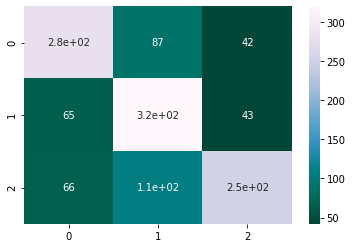

In [201]:
#prediction with accuracy and f1 scores for baseline model - NaiveBayes
print("Accuracy:",metrics.accuracy_score(Y_test_tfidf, pred_MNB_baseline_tfidf))
print("f1 Score", f1_score(Y_test_tfidf, pred_MNB_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_tfidf, pred_MNB_baseline_tfidf))
print("precision_score", precision_score(Y_test_tfidf, pred_MNB_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test_tfidf, pred_MNB_baseline_tfidf,average = "macro"))
cm = confusion_matrix(Y_test_tfidf, pred_MNB_baseline_tfidf)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")

<h3> Random Forest with Bag of Words - Baseline Model </h3>

In [202]:
classifier_RF_baseline_bow = RandomForestClassifier()
classifier_RF_baseline_bow.fit(X_train_bow,Y_train_bow)
pred_RF_baseline_bow = classifier_RF_baseline_bow.predict(X_test_bow)
pred_RF_baseline_bow

array([0, 1, 0, ..., 2, 1, 0])

Accuracy: 0.6502775574940524
f1 Score 0.6500319813629539
confusion_matrix [[287  64  58]
 [ 89 281  58]
 [101  71 252]]
precision_score 0.6539801755911272
recall_score 0.6508643900529395


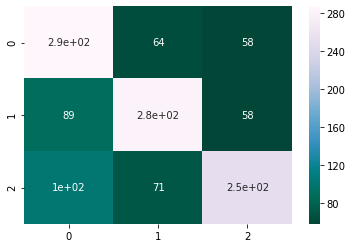

In [203]:
#prediction with accuracy and f1 scores for baseline model - Random Forest
print("Accuracy:",metrics.accuracy_score(Y_test_bow, pred_RF_baseline_bow))
print("f1 Score", f1_score(Y_test_bow, pred_RF_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_bow, pred_RF_baseline_bow))
print("precision_score", precision_score(Y_test_bow, pred_RF_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test_bow, pred_RF_baseline_bow,average = "macro"))
cm = confusion_matrix(Y_test_bow, pred_RF_baseline_bow)
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

<h3> Random Forest with TF-IDF - Baseline Model </h3>

In [204]:
classifier_RF_baseline_tfidf = RandomForestClassifier()
classifier_RF_baseline_tfidf.fit(X_train_tfidf,Y_train_tfidf)
pred_RF_baseline_tfidf = classifier_RF_baseline_tfidf.predict(X_test_tfidf)
pred_RF_baseline_tfidf

array([0, 0, 0, ..., 1, 1, 0])

Accuracy: 0.725614591593973
f1 Score 0.7256526538774194
confusion_matrix [[326  29  54]
 [ 58 315  55]
 [110  40 274]]
precision_score 0.7318787426929948
recall_score 0.7264245793918271


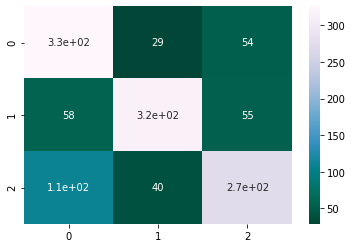

In [205]:
#prediction with accuracy and f1 scores for baseline model - Random Forest
print("Accuracy:",metrics.accuracy_score(Y_test_tfidf, pred_RF_baseline_tfidf))
print("f1 Score", f1_score(Y_test_tfidf, pred_RF_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_tfidf, pred_RF_baseline_tfidf))
print("precision_score", precision_score(Y_test_tfidf, pred_RF_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test_tfidf, pred_RF_baseline_tfidf,average = "macro"))
cm = confusion_matrix(Y_test_tfidf, pred_RF_baseline_tfidf)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")

<h3> Random Forest with Glove - Baseline Model </h3>

In [206]:
classifier_RF_baseline_glove = RandomForestClassifier()
classifier_RF_baseline_glove.fit(X_train_glove,Y_train_glove)
pred_RF_baseline_glove = classifier_RF_baseline_glove.predict(X_test_glove)
pred_RF_baseline_glove

array([2, 0, 0, ..., 1, 1, 0])

Accuracy: 0.6708961141950832
f1 Score 0.6708032204367834
confusion_matrix [[289  45  75]
 [ 59 305  64]
 [120  52 252]]
precision_score 0.6735763713184793
recall_score 0.6711859706880269


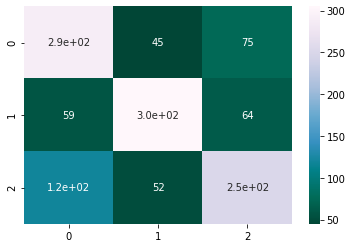

In [207]:
#prediction with accuracy and f1 scores for baseline model - Random Forest
print("Accuracy:",metrics.accuracy_score(Y_test_glove, pred_RF_baseline_glove))
print("f1 Score", f1_score(Y_test_glove, pred_RF_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_glove, pred_RF_baseline_glove))
print("precision_score", precision_score(Y_test_glove, pred_RF_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test_glove, pred_RF_baseline_glove,average = "macro"))
cm = confusion_matrix(Y_test_glove, pred_RF_baseline_glove)
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

<h3> SVM with Bag of Words - Baseline Model </h3>

In [208]:
classifier_svm_baseline_bow = SVC(kernel ='rbf')
classifier_svm_baseline_bow.fit(X_train_bow,Y_train_bow)
pred_SVM_baseline_bow = classifier_svm_baseline_bow.predict(X_test_bow)
pred_SVM_baseline_bow

array([0, 1, 0, ..., 2, 1, 0])

Accuracy: 0.6486915146708961
f1 Score 0.6482577046548731
confusion_matrix [[299  67  43]
 [101 269  58]
 [ 86  88 250]]
precision_score 0.653970337321141
recall_score 0.6497262197166355


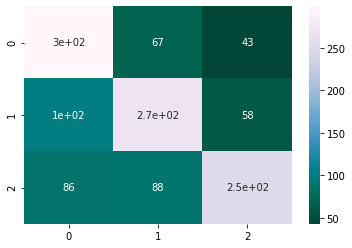

In [209]:
#prediction with accuracy and f1 scores for baseline model - SVM
print("Accuracy:",metrics.accuracy_score(Y_test_bow, pred_SVM_baseline_bow))
print("f1 Score", f1_score(Y_test_bow, pred_SVM_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_bow, pred_SVM_baseline_bow))
print("precision_score", precision_score(Y_test_bow, pred_SVM_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test_bow, pred_SVM_baseline_bow,average = "macro"))
cm = confusion_matrix(Y_test_bow, pred_SVM_baseline_bow)
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

<h3> SVM with TF-IDF - Baseline Model </h3>

In [210]:
classifier_svm_baseline_tfidf = SVC(kernel ='rbf')
classifier_svm_baseline_tfidf.fit(X_train_tfidf,Y_train_tfidf)
pred_SVM_baseline_tfidf = classifier_svm_baseline_tfidf.predict(X_test_tfidf)
pred_SVM_baseline_tfidf

array([0, 0, 0, ..., 1, 1, 0])

Accuracy: 0.7660586835844568
f1 Score 0.7667261889384123
confusion_matrix [[358   3  48]
 [ 88 286  54]
 [ 84  18 322]]
precision_score 0.7888339171941902
recall_score 0.7676546282671515


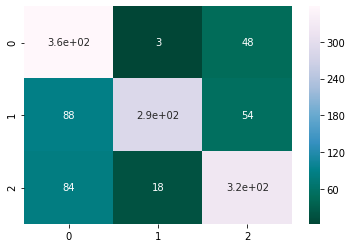

In [211]:
#prediction with accuracy and f1 scores for baseline model - SVM
print("Accuracy:",metrics.accuracy_score(Y_test_tfidf, pred_SVM_baseline_tfidf))
print("f1 Score", f1_score(Y_test_tfidf, pred_SVM_baseline_tfidf,average='macro'))
print("confusion_matrix", confusion_matrix(Y_test_tfidf, pred_SVM_baseline_tfidf))
print("precision_score", precision_score(Y_test_tfidf, pred_SVM_baseline_tfidf,average='macro'))
print("recall_score", recall_score(Y_test_tfidf, pred_SVM_baseline_tfidf,average='macro'))
cm = confusion_matrix(Y_test_tfidf, pred_SVM_baseline_tfidf)
sn.heatmap(cm, annot=True, cmap="PuBuGn_r")

<h3> SVM with Glove - Baseline Model </h3>

In [212]:
classifier_svm_baseline_glove = SVC(kernel ='rbf')
classifier_svm_baseline_glove.fit(X_train_glove,Y_train_glove)
pred_SVM_baseline_glove = classifier_svm_baseline_glove.predict(X_test_glove)
pred_SVM_baseline_glove

array([1, 0, 0, ..., 2, 2, 0])

Accuracy: 0.555908009516257
f1 Score 0.5569334397583567
confusion_matrix [[252 102  55]
 [100 227 101]
 [ 70 132 222]]
precision_score 0.5589552648388273
recall_score 0.5566985522504939


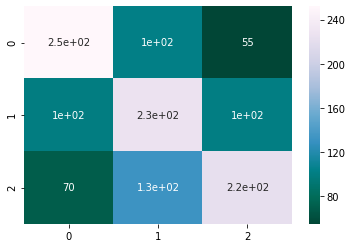

In [213]:
#prediction with accuracy and f1 scores for baseline model - SVM
print("Accuracy:",metrics.accuracy_score(Y_test_glove, pred_SVM_baseline_glove))
print("f1 Score", f1_score(Y_test_glove, pred_SVM_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_glove, pred_SVM_baseline_glove))
print("precision_score", precision_score(Y_test_glove, pred_SVM_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test_glove, pred_SVM_baseline_glove,average = "macro"))
cm = confusion_matrix(Y_test_glove, pred_SVM_baseline_glove)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")

<h3> Logistic Regression with BoW - Baseline Model </h3>

In [214]:
classifier_log_baseline_bow = LogisticRegression()
classifier_log_baseline_bow.fit(X_train_bow,Y_train_bow)
pred_Log_baseline_bow = classifier_log_baseline_bow.predict(X_test_bow)
pred_Log_baseline_bow

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([0, 1, 0, ..., 2, 1, 0])

Accuracy: 0.6558287073750991
f1 Score 0.6562865760030901
confusion_matrix [[274  87  48]
 [ 79 291  58]
 [ 64  98 262]]
precision_score 0.6601251333606114
recall_score 0.6559192402415699


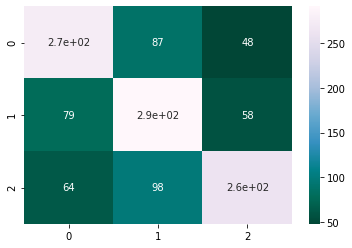

In [215]:
#prediction with accuracy and f1 scores for baseline model - SVM
print("Accuracy:",metrics.accuracy_score(Y_test_bow, pred_Log_baseline_bow))
print("f1 Score", f1_score(Y_test_bow, pred_Log_baseline_bow,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_bow, pred_Log_baseline_bow))
print("precision_score", precision_score(Y_test_bow, pred_Log_baseline_bow,average = "macro"))
print("recall_score", recall_score(Y_test_bow, pred_Log_baseline_bow,average = "macro"))
cm = confusion_matrix(Y_test_bow, pred_Log_baseline_bow)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")

<h3> Logistic Regression with TF-IDF - Baseline Model </h3>

In [216]:
classifier_log_baseline_tfidf = LogisticRegression()
classifier_log_baseline_tfidf.fit(X_train_tfidf,Y_train_tfidf)
pred_Log_baseline_tfidf = classifier_log_baseline_tfidf.predict(X_test_tfidf)
pred_Log_baseline_tfidf

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([0, 0, 0, ..., 1, 1, 0])

Accuracy: 0.7129262490087233
f1 Score 0.7134721140412693
confusion_matrix [[304  67  38]
 [ 62 303  63]
 [ 50  82 292]]
precision_score 0.7147085858664592
recall_score 0.7132998180450819


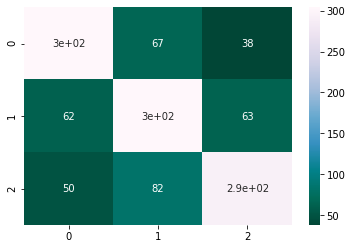

In [217]:
#prediction with accuracy and f1 scores for baseline model - SVM
print("Accuracy:",metrics.accuracy_score(Y_test_tfidf, pred_Log_baseline_tfidf))
print("f1 Score", f1_score(Y_test_tfidf, pred_Log_baseline_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_tfidf, pred_Log_baseline_tfidf))
print("precision_score", precision_score(Y_test_tfidf, pred_Log_baseline_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test_tfidf, pred_Log_baseline_tfidf,average = "macro"))
cm = confusion_matrix(Y_test_tfidf, pred_Log_baseline_tfidf)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")

<h3> Logistic Regression with Glove - Baseline Model </h3>

In [218]:
classifier_log_baseline_glove = LogisticRegression()
classifier_log_baseline_glove.fit(X_train_glove,Y_train_glove)
pred_Log_baseline_glove = classifier_log_baseline_glove.predict(X_test_glove)
pred_Log_baseline_glove

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([2, 0, 0, ..., 2, 2, 0])

Accuracy: 0.5503568596352102
f1 Score 0.5479680230321
confusion_matrix [[265  76  68]
 [114 188 126]
 [ 88  95 241]]
precision_score 0.5483838962856894
recall_score 0.5518567744182968


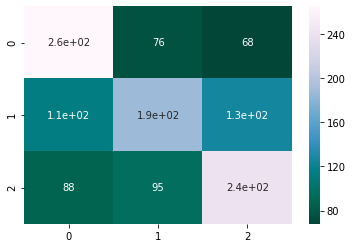

In [219]:
#prediction with accuracy and f1 scores for baseline model - SVM
print("Accuracy:",metrics.accuracy_score(Y_test_glove, pred_Log_baseline_glove))
print("f1 Score", f1_score(Y_test_glove, pred_Log_baseline_glove,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_glove, pred_Log_baseline_glove))
print("precision_score", precision_score(Y_test_glove, pred_Log_baseline_glove,average = "macro"))
print("recall_score", recall_score(Y_test_glove, pred_Log_baseline_glove,average = "macro"))
cm = confusion_matrix(Y_test_glove, pred_Log_baseline_glove)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")

<h3> Based on Baseline Model's accuracy </h3> 
<p> We decided 3 algorithms with TF-IDF features <b>(Random Forest, SVM, Logistic Regression)</b> </p>

<h2> Hyperparameter Tuning </h2>

<h3> Hyper parameter for RandomForest via RandomizedSearchCV - TF-IDF</h3>

In [510]:
#input range of values for hyperparameter tuning.
param_rand = {"n_estimators": np.arange(100,1000,10), "max_depth": np.arange(10,2000,10), "min_samples_leaf": np.arange(10,1000,10), "criterion": ["gini","entropy"]}

# implementation of RandomForestClassifier with RandomizedSearchCV
rand_hyper_tfidf = RandomForestClassifier(random_state = 1)
RF_hyper_tfidf = RandomizedSearchCV(rand_hyper_tfidf, n_iter = 1000, param_distributions=param_rand, cv=5, n_jobs=-1,verbose=1)

#Fit the Random Forest model with X_train and y_train
RF_hyper_tfidf = RF_hyper_tfidf.fit(X_train_tfidf,Y_train_tfidf)

print(RF_hyper_tfidf.best_score_)
print(RF_hyper_tfidf.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed: 21.0min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed: 29.5min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 37.9min
[Parallel(n_jobs=-1)]: Done 4042 tasks      | elapsed: 47.1min
[Parallel(n_jobs=-1)]: Done 4992 tasks      | elapsed: 61.5min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 61.6min finished


0.6541039375776739
{'n_estimators': 600, 'min_samples_leaf': 10, 'max_depth': 1560, 'criterion': 'gini'}


In [258]:
classifier_RF_hyper_tfidf = RandomForestClassifier(n_estimators= 200, min_samples_leaf= 1, max_depth=350, criterion = 'gini')
classifier_RF_hyper_tfidf.fit(X_train_tfidf,Y_train_tfidf)
pred_RF_hyper_tfidf = classifier_RF_hyper_tfidf.predict(X_test_tfidf)

Accuracy: 0.7303727200634417
f1 Score 0.7307585253237426
confusion_matrix [[319  28  62]
 [ 54 317  57]
 [ 98  41 285]]
precision_score 0.7346571485966127
recall_score 0.7309250390575768


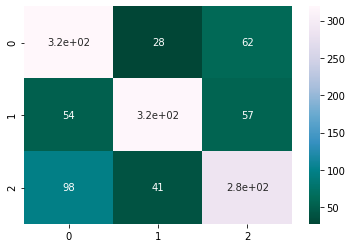

In [259]:
#prediction with accuracy and f1 scores for baseline model - RandomForest
print("Accuracy:",metrics.accuracy_score(Y_test_tfidf, pred_RF_hyper_tfidf))
print("f1 Score", f1_score(Y_test_tfidf, pred_RF_hyper_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_tfidf, pred_RF_hyper_tfidf))
print("precision_score", precision_score(Y_test_tfidf, pred_RF_hyper_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test_tfidf, pred_RF_hyper_tfidf,average = "macro"))
cm = confusion_matrix(Y_test_tfidf, pred_RF_hyper_tfidf)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")

<h3> Hyper parameter for SVM via RandomizedSearchCV - TF-IDF</h3>

In [511]:
#input range of values for hyperparameter tuning.
param_rand = {"C": np.arange(1,5,0.05)}

# implementation of RandomForestClassifier with RandomizedSearchCV
svm_hyper_tfidf = SVC()
SVM_hyper_tfidf = RandomizedSearchCV(svm_hyper_tfidf, n_iter = 150, param_distributions=param_rand, cv=5, n_jobs=-1,verbose=1)

#Fit the Random Forest model with X_train and y_train
SVM_hyper_tfidf = SVM_hyper_tfidf.fit(X_train_tfidf,Y_train_tfidf)

print(SVM_hyper_tfidf.best_score_)
print(SVM_hyper_tfidf.best_params_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning:

The total space of parameters 80 is smaller than n_iter=150. Running 80 iterations. For exhaustive searches, use GridSearchCV.

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed: 19.6min finished


0.761600555319584
{'C': 1.4500000000000004}


In [222]:
classifier_SVM_hyper_tfidf = SVC(C=1.4)
classifier_SVM_hyper_tfidf.fit(X_train_tfidf,Y_train_tfidf)
pred_SVM_hyper_tfidf = classifier_SVM_hyper_tfidf.predict(X_test_tfidf)

Accuracy: 0.7850911974623315
f1 Score 0.7856692116306849
confusion_matrix [[355  10  44]
 [ 75 312  41]
 [ 73  28 323]]
precision_score 0.7962868818833034
recall_score 0.7862450251979034


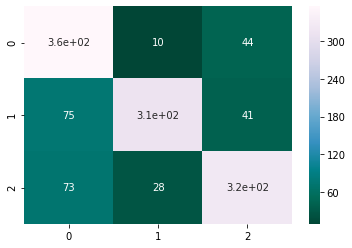

In [223]:
#prediction with accuracy and f1 scores for baseline model - SVM
print("Accuracy:",metrics.accuracy_score(Y_test_tfidf, pred_SVM_hyper_tfidf))
print("f1 Score", f1_score(Y_test_tfidf, pred_SVM_hyper_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_tfidf, pred_SVM_hyper_tfidf))
print("precision_score", precision_score(Y_test_tfidf, pred_SVM_hyper_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test_tfidf, pred_SVM_hyper_tfidf,average = "macro"))
cm = confusion_matrix(Y_test_tfidf, pred_SVM_hyper_tfidf)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")

<h3> Hyper parameter for Logistic Regression via RandomizedSearchCV - TF-IDF</h3>

In [512]:
#input range of values for hyperparameter tuning.
param_rand = {"C": np.arange(1,10,0.1),"multi_class":["auto", "ovr", "multinomial"], "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"], "penalty": ["l1", "l2", "elasticnet", "none"]}

# implementation of RandomForestClassifier with RandomizedSearchCV
svm_hyper_tfidf = LogisticRegression()
SVM_hyper_tfidf = RandomizedSearchCV(svm_hyper_tfidf, n_iter = 1000, param_distributions=param_rand, cv=5, n_jobs=-1,verbose=1)

#Fit the Random Forest model with X_train and y_train
SVM_hyper_tfidf = SVM_hyper_tfidf.fit(X_train_tfidf,Y_train_tfidf)

print(SVM_hyper_tfidf.best_score_)
print(SVM_hyper_tfidf.best_params_)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   12.0s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 630 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1064 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 1754 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 2440 tasks      | elapsed:  8.9min
[Parallel(n_jobs=-1)]: Done 3418 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 4488 tasks      | elapsed: 14.6min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed: 16.2min finished
/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer

0.7227275945065836
{'solver': 'lbfgs', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 9.000000000000007}


/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [220]:
classifier_Log_hyper_tfidf = LogisticRegression(multi_class= 'ovr', C= 9)
classifier_Log_hyper_tfidf.fit(X_train_tfidf,Y_train_tfidf)
pred_LOG_hyper_tfidf = classifier_Log_hyper_tfidf.predict(X_test_tfidf)

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/Users/j/opt/anaconda3/lib

Accuracy: 0.7295796986518636
f1 Score 0.7290415935469966
confusion_matrix [[292  72  45]
 [ 43 340  45]
 [ 58  78 288]]
precision_score 0.7329282858181441
recall_score 0.7291914122337341


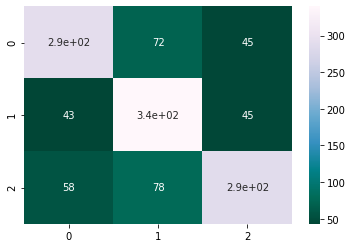

In [221]:
#prediction with accuracy and f1 scores for baseline model - SVM
print("Accuracy:",metrics.accuracy_score(Y_test_tfidf, pred_LOG_hyper_tfidf))
print("f1 Score", f1_score(Y_test_tfidf, pred_LOG_hyper_tfidf,average = "macro"))
print("confusion_matrix", confusion_matrix(Y_test_tfidf, pred_LOG_hyper_tfidf))
print("precision_score", precision_score(Y_test_tfidf, pred_LOG_hyper_tfidf,average = "macro"))
print("recall_score", recall_score(Y_test_tfidf, pred_LOG_hyper_tfidf,average = "macro"))
cm = confusion_matrix(Y_test_tfidf, pred_LOG_hyper_tfidf)
sn.heatmap(cm,annot=True, cmap="PuBuGn_r")